# Data Science Salaries
Из открытых источников доступны исторические данные о размере заработной платы работников Data Science. Нам нужно определить паттерны высокоплачиваемого работника и найти инсайты. 

представлены данные  за период 2020 - 2023 гг., поэтому будем определять, что будет являться успешной профессией в IT в 2024 году.

Название столбцов и их обозначение:

work_year: Год, когда была выплачена зарплата.

experience_level: Уровень опыта работы на данной должности в течение года

employment_type: Тип занятости для данной роли

job_title: Должность, на которой работал сотрудник в течение года.

salary: Общая сумма зарплаты GROSS

salary_currency: Валюта зарплаты в виде кода валюты ISO 4217.

salary_in_usd: зарплата в долларах США. Целевая переменная.

employee_residence: Основная страна пребывания сотрудника в течение рабочего года в виде кода страны ISO 3166.

remote_ratio: Общий объем работы, выполняемой удаленно

company_location: Страна, в которой находится главный офис или филиал работодателя.

company_size: Медианное количество человек, работавших в компании в течение года

Ссылка на датасет: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

## Изучение данных

Откроем файл с данными и изучим общую информацию:

In [2]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

pd.options.display.max_columns = None # полностью отображаем столбцы
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('ds_salaries.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [6]:
df.describe(include='object').T

,count,unique,top,freq
experience_level,3755,4,SE,2516
employment_type,3755,4,FT,3718
job_title,3755,93,Data Engineer,1040
salary_currency,3755,20,USD,3224
employee_residence,3755,78,US,3004
company_location,3755,72,US,3040
company_size,3755,3,M,3153


## Предобработка данных

### Поиск ошибок

Проверим есть ли в нашем датасете ошибочные данные - данные, не входящие в период исследования, равный (2020-2023)

In [122]:
df[df.work_year > 2023]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_size_numeric


In [123]:
df[df.work_year < 2020]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_size_numeric


### Переформатирование столбцов

Заменим верхний регистр на нижний в названии столбцов.

In [124]:
df.columns = df.columns.str.lower()

df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size',
       'company_size_numeric'],
      dtype='object')

### Обработка пропусков

In [125]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_size_numeric
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,3
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,1
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,1
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,2
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,2
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L,3
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L,3
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M,2
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M,2
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M,2


Проверим, какая профессия самая популярная.

In [126]:
df['job_title'].value_counts()

job_title
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Principal Data Architect       1
Head of Machine Learning       1
Cloud Data Architect           1
Staff Data Scientist           1
Finance Data Analyst           1
Name: count, Length: 93, dtype: int64

Проверим, в какой профессии самая разнообразная оплата труда.

In [127]:
df.groupby('job_title')['salary_in_usd'].agg('nunique').sort_values(ascending=False).head(10)

job_title
Data Scientist               358
Data Engineer                355
Data Analyst                 229
Machine Learning Engineer    154
Analytics Engineer            65
Data Architect                56
Research Scientist            51
Data Science Manager          47
ML Engineer                   33
Research Engineer             27
Name: salary_in_usd, dtype: int64

In [128]:
df[df['job_title'] == 'Data Engineer']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_size_numeric
31,2023,SE,FT,Data Engineer,253200,USD,253200,US,0,US,M,2
32,2023,SE,FT,Data Engineer,90700,USD,90700,US,0,US,M,2
35,2023,MI,FT,Data Engineer,162500,USD,162500,US,0,US,M,2
36,2023,MI,FT,Data Engineer,130000,USD,130000,US,0,US,M,2
44,2023,SE,FT,Data Engineer,270703,USD,270703,US,0,US,M,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3711,2020,MI,FT,Data Engineer,110000,USD,110000,US,100,US,L,3
3717,2021,SE,FT,Data Engineer,65000,EUR,76833,RO,50,GB,S,1
3739,2021,MI,FT,Data Engineer,38400,EUR,45391,NL,100,NL,L,3
3743,2020,MI,FT,Data Engineer,130800,USD,130800,ES,100,US,M,2


проверим данные на наличие пропусков:

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   work_year             2584 non-null   int64 
 1   experience_level      2584 non-null   object
 2   employment_type       2584 non-null   object
 3   job_title             2584 non-null   object
 4   salary                2584 non-null   int64 
 5   salary_currency       2584 non-null   object
 6   salary_in_usd         2584 non-null   int64 
 7   employee_residence    2584 non-null   object
 8   remote_ratio          2584 non-null   int64 
 9   company_location      2584 non-null   object
 10  company_size          2584 non-null   object
 11  company_size_numeric  2584 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 262.4+ KB


пропусков не обнаружено. во всех 3755 строчках заполнены данные.

In [130]:
df.isna().sum()

work_year               0
experience_level        0
employment_type         0
job_title               0
salary                  0
salary_currency         0
salary_in_usd           0
employee_residence      0
remote_ratio            0
company_location        0
company_size            0
company_size_numeric    0
dtype: int64

### Преобразование форматов

В датасете представлены два формата: целочисленные данные и object. следовательно, отсутвует необходимость в преобразованиях.

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   work_year             2584 non-null   int64 
 1   experience_level      2584 non-null   object
 2   employment_type       2584 non-null   object
 3   job_title             2584 non-null   object
 4   salary                2584 non-null   int64 
 5   salary_currency       2584 non-null   object
 6   salary_in_usd         2584 non-null   int64 
 7   employee_residence    2584 non-null   object
 8   remote_ratio          2584 non-null   int64 
 9   company_location      2584 non-null   object
 10  company_size          2584 non-null   object
 11  company_size_numeric  2584 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 262.4+ KB


Проверим наличие дупликатов в строках:

In [132]:
duplicates = df.duplicated()

if duplicates.any():
    print(f"Найдено {duplicates.sum()} дубликатов. Удаляем их.")

Удаляем обнаруженные дупликаты:

In [133]:
df = df.drop_duplicates()
    
    

In [134]:
# Сохранение обновленного датасета без дубликатов
df.to_csv('ds_salaries_cleaned.csv', index=False)
    
print("Дубликаты успешно удалены и обновленный датасет сохранен в 'ds_salaries_cleaned.csv'.")

# Если нужно проверить конкретные столбцы на дублирование
# duplicates_specific_columns = df.duplicated(subset=['column_name1', 'column_name2'])

Дубликаты успешно удалены и обновленный датасет сохранен в 'ds_salaries_cleaned.csv'.


Итоговая таблица.

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   work_year             2584 non-null   int64 
 1   experience_level      2584 non-null   object
 2   employment_type       2584 non-null   object
 3   job_title             2584 non-null   object
 4   salary                2584 non-null   int64 
 5   salary_currency       2584 non-null   object
 6   salary_in_usd         2584 non-null   int64 
 7   employee_residence    2584 non-null   object
 8   remote_ratio          2584 non-null   int64 
 9   company_location      2584 non-null   object
 10  company_size          2584 non-null   object
 11  company_size_numeric  2584 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 262.4+ KB


In [136]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_size_numeric
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,3
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,1
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,1
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,2
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,2


## Визуализация

Необходимые исследования:

1. Какие самые высокооплачиваемые должности? Есть ли выбросы в заработной плате? В каких должностях?

2. Влияет ли удаленная работа на зарплату? Есть ли корреляция?

3. Зависит ли заработная плата от размера предприятия?

4. Какие страны наиболее популярны среди вакансий? В каких заработная плата выше, а в каких ниже?

5. Оцените медианную зарплату для каждой должности.

6. Оцените, как сильно изменились зарплаты в 2023 году, относительно 2020. Какие должности стали более оплачиваемы, а какие нет?

7. Выявите портрет самого успешного и богатого работника: кем он должен работать, где проживать, удаленная ли работа.

8. Много ли людей работают и проживают в разных регионах? Где больше всего людей проживает и много ли из них (в процентном соотношении) работают удаленно на другую страну?
Выявите новые инсайты

### 1. Самые высокооплачиваемые должности. Анализ выбросов

1.1  Какие самые высокооплачиваемые должности? 

In [24]:
# Сортируем по столбцу 'salary_in_usd' в порядке убывания
df_sorted = df.sort_values(by='salary_in_usd', ascending=False)

# Выводим должности с самыми высокими зарплатами
top_paid_jobs = df_sorted[['job_title', 'salary_in_usd']].drop_duplicates().head()

print(top_paid_jobs)


                               job_title  salary_in_usd
3522                  Research Scientist         450000
2011                        Data Analyst         430967
528                         AI Scientist         423834
3747  Applied Machine Learning Scientist         423000
3675            Principal Data Scientist         416000


Проиллюстрируем данное наблюдение с помощью столбчатой диаграммы.

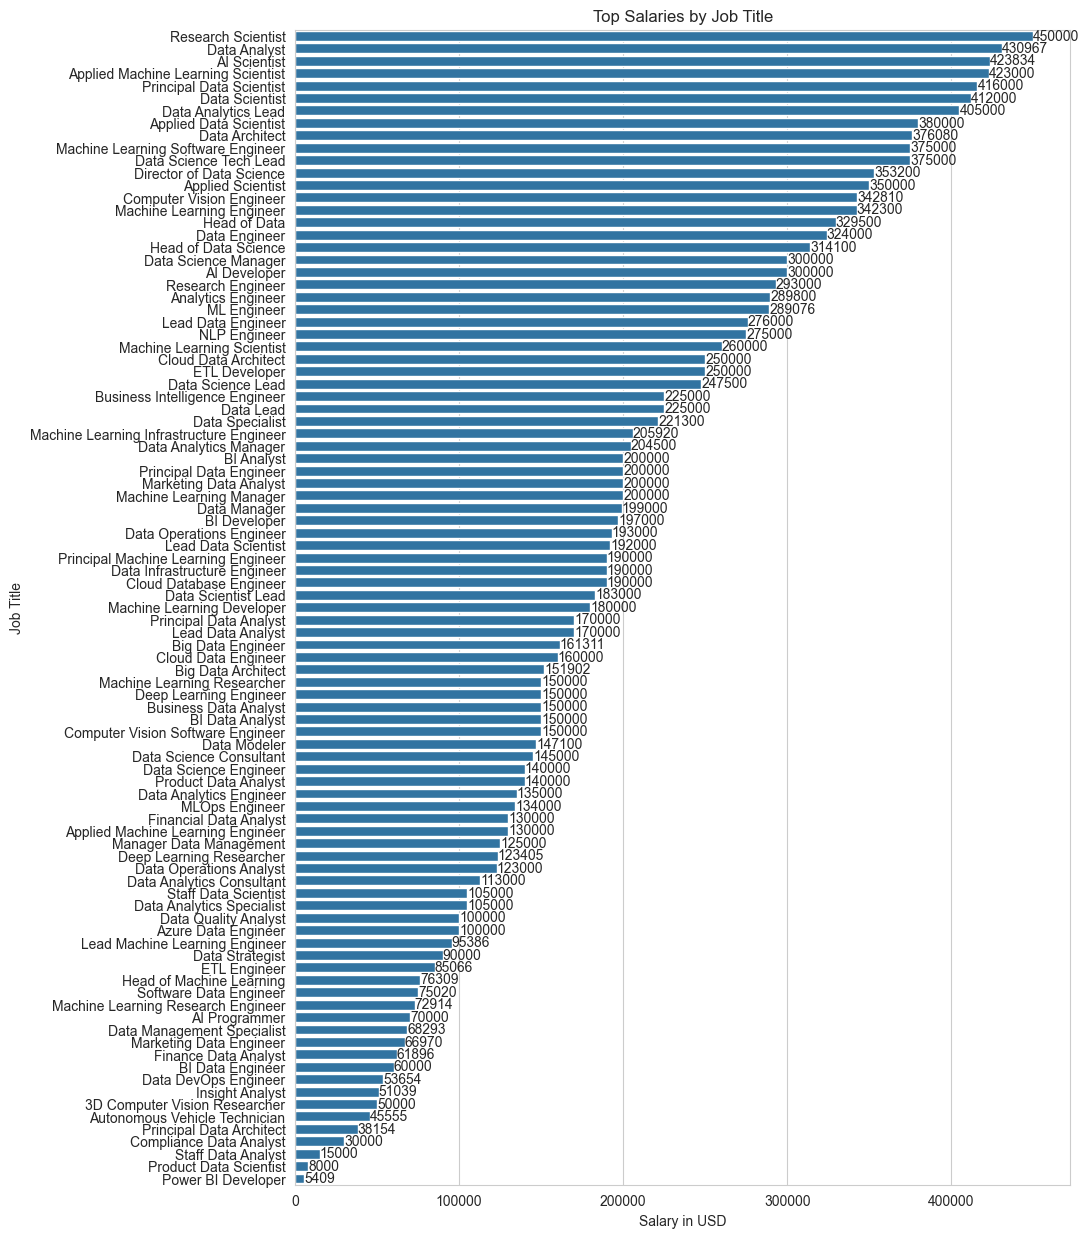

In [75]:
# Группируем данные по job_title, находим максимальные зарплаты для каждой должности и сортируем по убыванию
temp = df.groupby(['job_title'])['salary_in_usd'].max().sort_values(ascending=False)
# Столбчатая диаграмма
plt.figure(figsize=(10,15))
ax = sns.barplot(x=temp, y=temp.index, orient='h', order=temp.index)
ax.bar_label(ax.containers[0])
plt.title('Top Salaries by Job Title')
plt.xlabel('Salary in USD')
plt.ylabel('Job Title')
plt.show()

1.2 Есть ли выбросы в заработной плате? В каких должностях?

In [45]:

# Анализ выбросов
q1 = df['salary_in_usd'].quantile(0.25)
q3 = df['salary_in_usd'].quantile(0.75)
iqr = q3 - q1  # Interquartile Range

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Выводим информацию о выбросах
outliers = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]

print("Выбросы в з.п:")
print(outliers[['job_title', 'salary_in_usd']])


Выбросы в з.п:
                               job_title  salary_in_usd
33              Computer Vision Engineer         342810
133            Machine Learning Engineer         342300
145            Machine Learning Engineer         318300
228                         Head of Data         329500
478             Director of Data Science         353200
488                       Data Scientist         317070
528                         AI Scientist         423834
649                       Data Architect         376080
845                   Research Scientist         340000
1105                      Data Scientist         370000
1116           Machine Learning Engineer         323300
1258  Machine Learning Software Engineer         375000
1288                        Data Analyst         385000
1311                  Research Scientist         370000
1396                Head of Data Science         314100
1421                   Applied Scientist         350000
2011                        Data 

### 2. Корреляция между удаленной работой и заработной платой

2. Влияет ли удаленная работа на зарплату? Есть ли корреляция?

Для того чтобы определить, существует ли корреляция, нужно рассчитать корреляцию между (remote_ratio) и (salary_in_usd).

Корреляция между уровнем удаленной работы и размером заработной платы: -0.08450228727662648


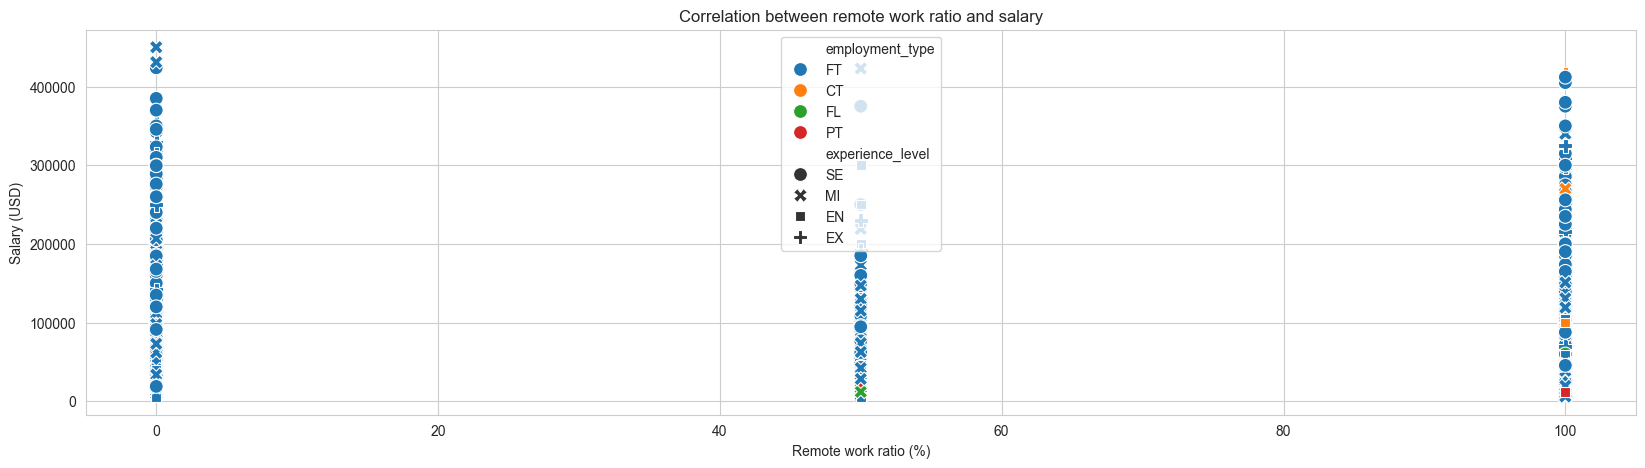

In [137]:
# Вычисление корреляции между remote_ratio и salary_in_usd
correlation = df[['remote_ratio', 'salary_in_usd']].corr().iloc[0, 1]
print(f'Корреляция между уровнем удаленной работы и размером заработной платы: {correlation}')

# Визуализация корреляции
plt.figure(figsize=(20, 5))
sns.scatterplot(data=df, x='remote_ratio', y='salary_in_usd', hue='employment_type', style='experience_level', s=100)
plt.title('Correlation between remote work ratio and salary')
plt.xlabel('Remote work ratio (%)')
plt.ylabel('Salary (USD)')
plt.grid(True)
plt.show()

Найденное значение корреляции между переменными указывает на незначительное влияние уровня удаленной работы на з.п. Зависимость - обратная, т.е. с увеличением доли удаленной работы размер з.п. имеет тенденцию к снижению.

### 3. Корреляция между размером предприятия и заработной платой.

3. Зависит ли заработная плата от размера предприятия?

Корреляция между размером компании и зарплатой: -0.00


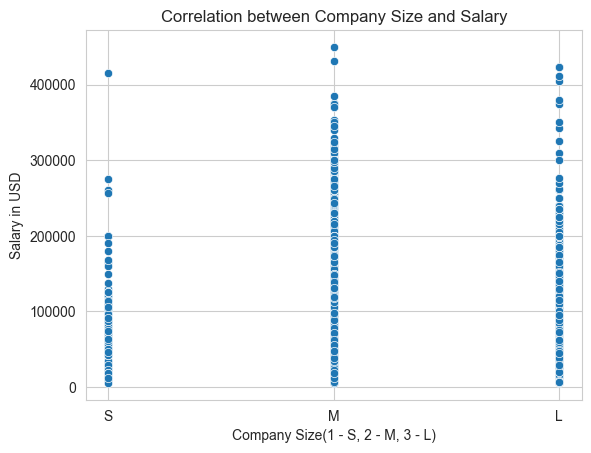

In [138]:
# Кодируем размер компании
size_mapping = {'S': 1, 'M': 2, 'L': 3}
df['company_size_numeric'] = df['company_size'].map(size_mapping)

# Вычисляем корреляцию
correlation = df['salary_in_usd'].corr(df['company_size_numeric'])
print(f'Корреляция между размером компании и зарплатой: {correlation:.2f}')

# Визуализируем корреляцию
sns.scatterplot(data=df, x='company_size_numeric', y='salary_in_usd')
plt.title('Correlation between Company Size and Salary')
plt.xlabel('Company Size(1 - S, 2 - M, 3 - L)')
plt.ylabel('Salary in USD')
plt.xticks([1, 2, 3], ['S', 'M', 'L'])
plt.show()

Размер компании, вероятнее всего, не оказывает влияние на размер заработной платы.

### 4. Анализ заработной платы по странам

4.1 Какие страны наиболее популярны среди вакансий? 

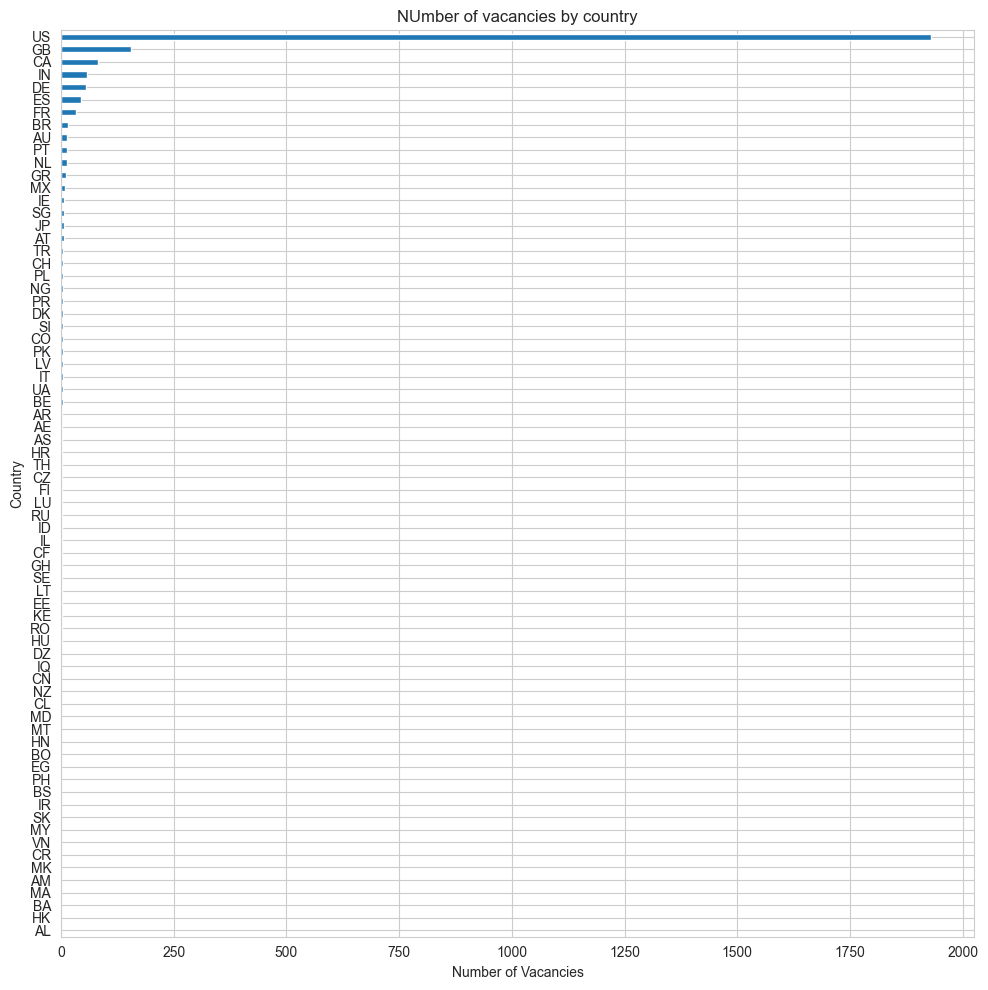

In [111]:

# Подсчет количества вакансий по странам
country_counts = df['company_location'].value_counts().sort_values(ascending=True)



# Визуализация (горизонтальная столбчатая диаграмма)
plt.figure(figsize=(10, 10))
country_counts.plot(kind='barh')
plt.title('NUmber of vacancies by country')
plt.xlabel('Number of Vacancies')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


Соединенные Штаты и Великобритания - наиболее пополярны среди  Data Science вакансий.

4.2 В каких заработная плата выше, а в каких ниже?

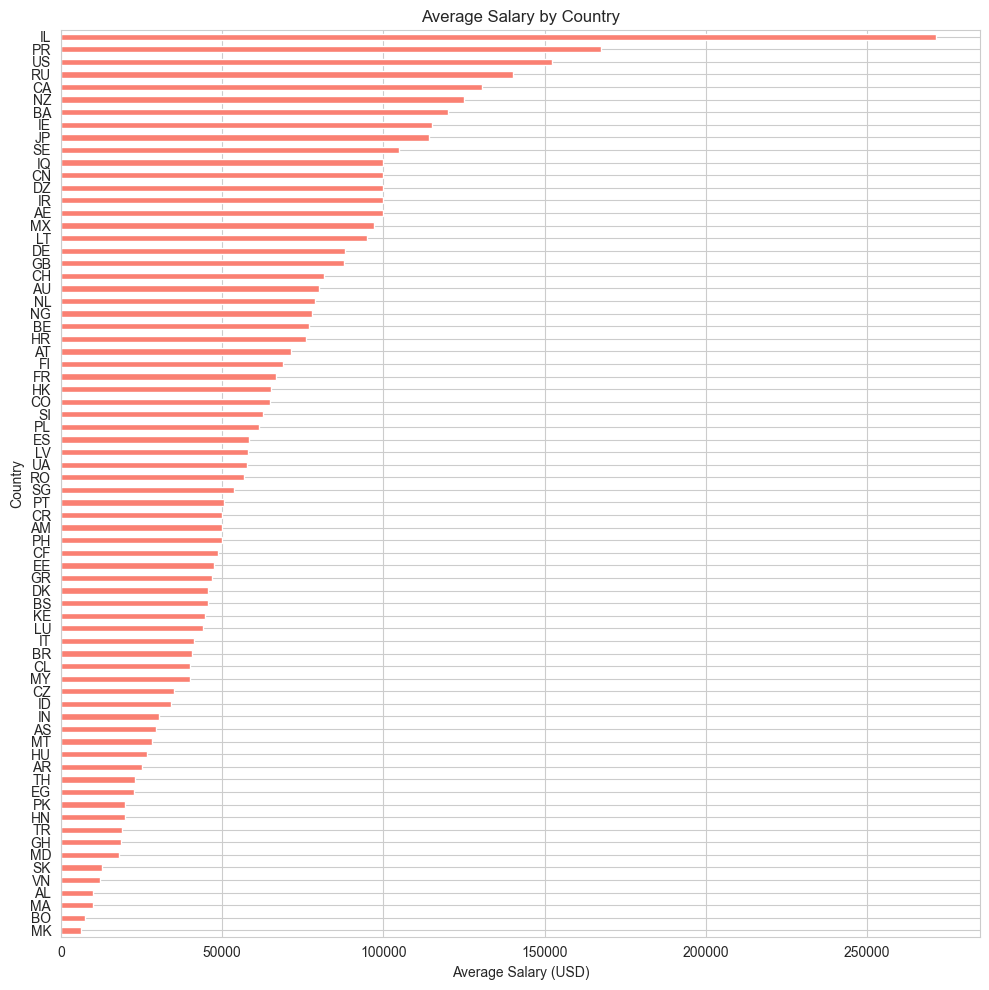

In [102]:
# посчитаем среднюю зарплату по странам
average_salaries = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=True)

# сделаем bar chart
plt.figure(figsize=(10, 10))
average_salaries.plot(kind='barh', color='salmon')
plt.title('Average Salary by Country')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


### 5. Оценка медианной зарплаты для каждой должности.

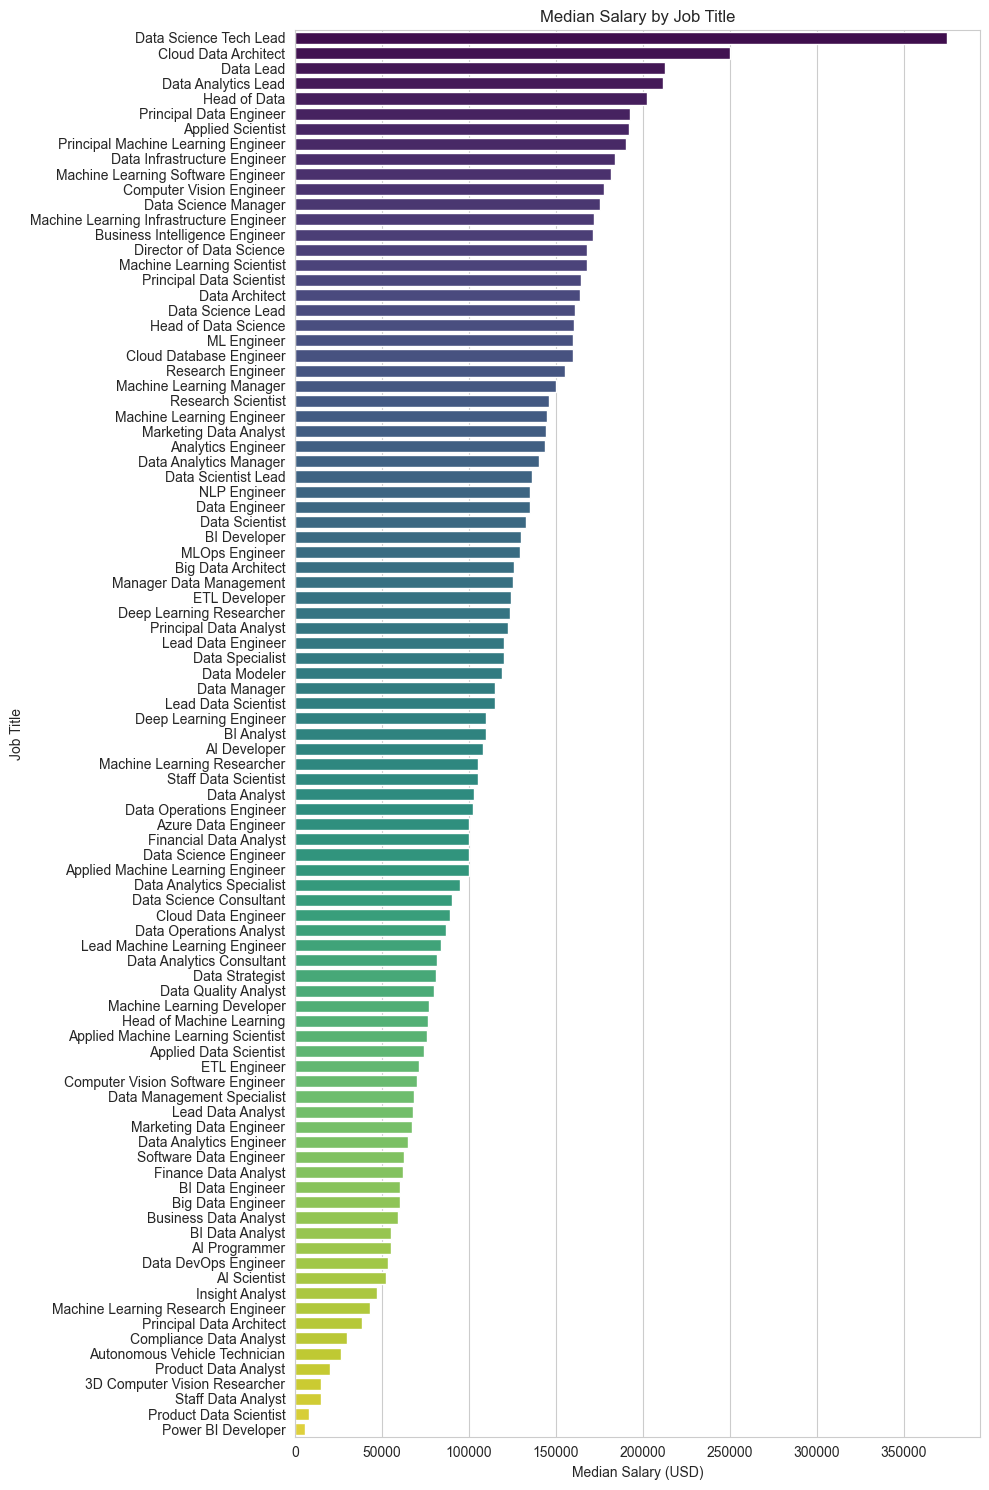

In [121]:
# Группировка по должности и вычисление медианной зарплаты
# Grouping by job title and calculating the median salary
median_salaries = df.groupby('job_title')['salary_in_usd'].median().reset_index()

#отсортируем по убыванию
median_salaries = median_salaries.sort_values(by='salary_in_usd', ascending=False)

# Visualizing the results 
plt.figure(figsize=(10, 15))
sns.barplot(data=median_salaries, y='job_title', x='salary_in_usd', palette='viridis')  # Swap x and y
plt.title('Median Salary by Job Title')
plt.ylabel('Job Title')  # Label for the y-axis
plt.xlabel('Median Salary (USD)')  # Label for the x-axis
plt.tight_layout()  # Adjust layout
plt.show()




Самую высокую медианную зарплату имеют следующие позиции : DataScience Tech Lead, Cloud Data Architect.

### 6. Оцените, как сильно изменились зарплаты в 2023 году, относительно 2020. Какие должности стали более оплачиваемы, а какие нет?

Средние зарплаты в 2020:

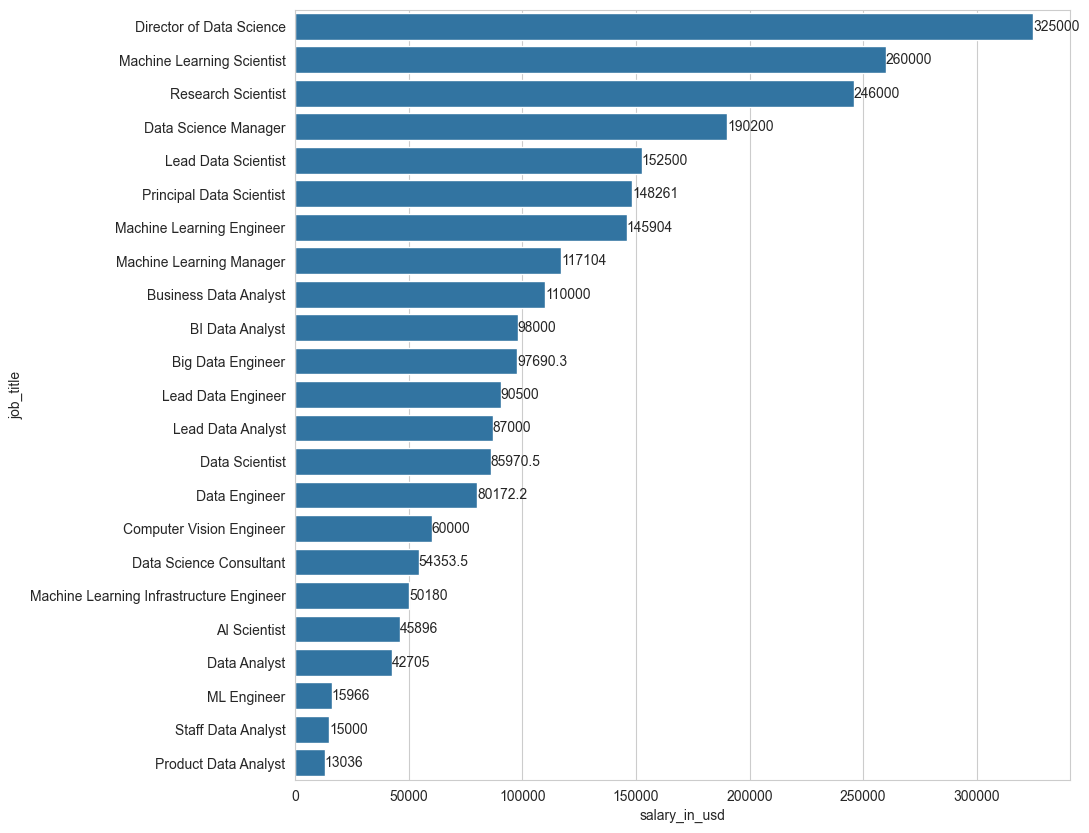

In [144]:
temp = df[df['work_year']==2020].groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,10))
ax = sns.barplot(x=temp, y=temp.index, orient='h')
ax.bar_label(ax.containers[0])
plt.show()

Средние зарплаты в 2023:

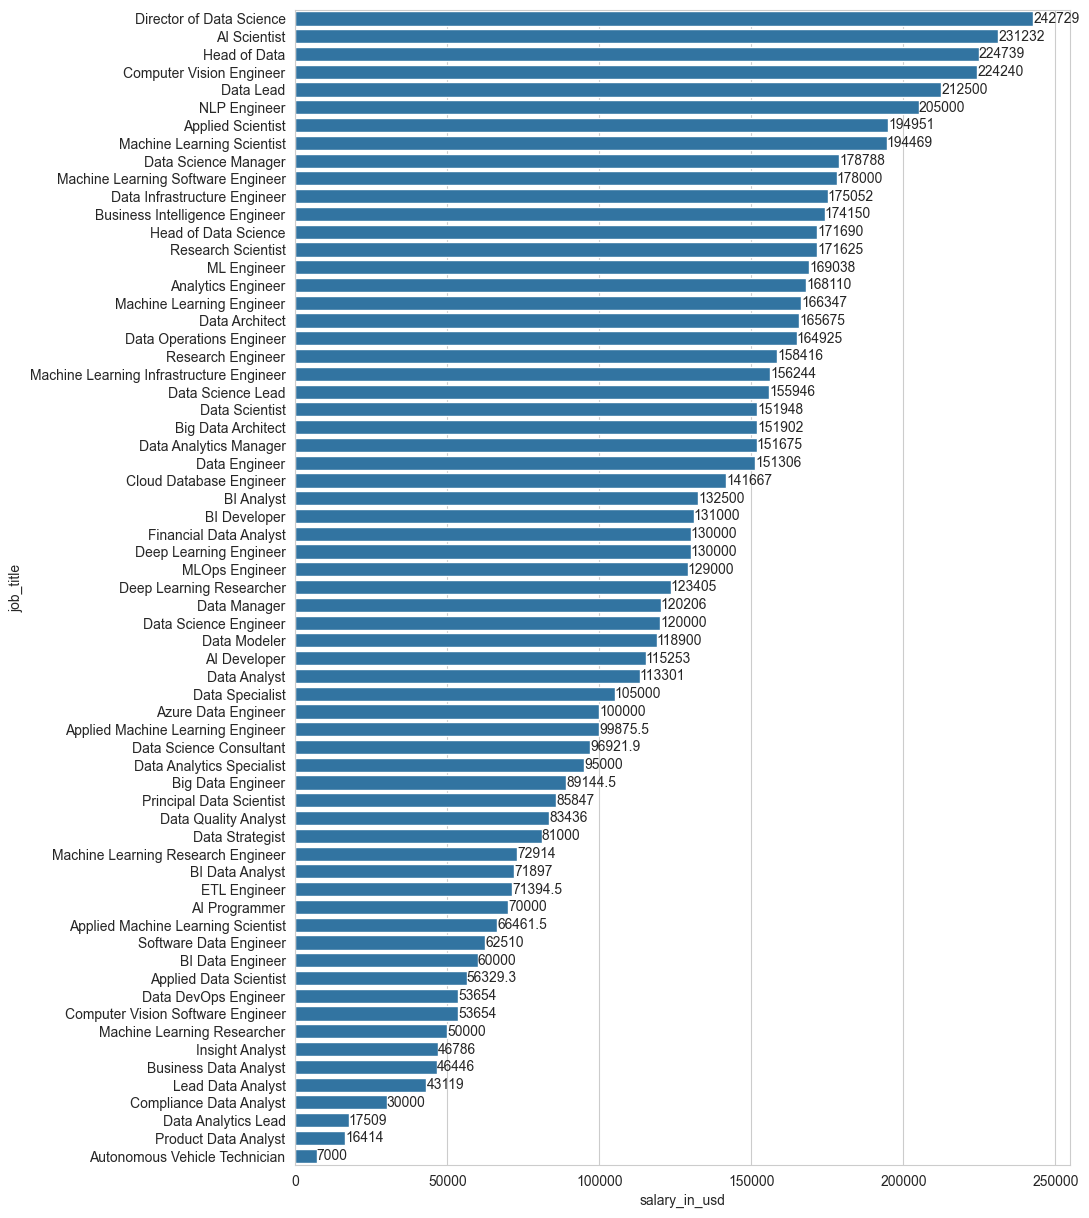

In [152]:
temp = df[df['work_year']==2023].groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,15))
ax = sns.barplot(x=temp, y=temp.index, orient='h')
ax.bar_label(ax.containers[0])
plt.show()

Топ-3 высокооплачиваемые должности в 2020 году стали менее высокооплачиваемыми в 2023 году. Данное изменение , скорее всего, связано с увеличением выборки.

### 7. Выявите портрет самого успешного и богатого работника: кем он должен работать, где проживать, удаленная ли работа.

In [153]:
# Поиск работника с наивысшей зарплатой
richest_employee = df.loc[df['salary_in_usd'].idxmax()]

# Формирование портрета успешного работника
portrait = {
    'job_title': richest_employee['job_title'],
    'salary': richest_employee['salary_in_usd'],
    'employee_residence': richest_employee['employee_residence'],
    'remote_work': 'Yes' if richest_employee['remote_ratio'] == 100 else 'No'
}

# Вывод полученной информации
print("Портрет самого успешного и богатого работника:")
print(f"Должность: {portrait['job_title']}")
print(f"Зарплата (USD): {portrait['salary']}")
print(f"Место проживания: {portrait['employee_residence']}")
print(f"Удаленная работа: {portrait['remote_work']}")

Портрет самого успешного и богатого работника:
Должность: Research Scientist
Зарплата (USD): 450000
Место проживания: US
Удаленная работа: No


### 8. Много ли людей работают и проживают в разных регионах? Где больше всего людей проживает и много ли из них (в процентном соотношении) работают удаленно на другую страну?

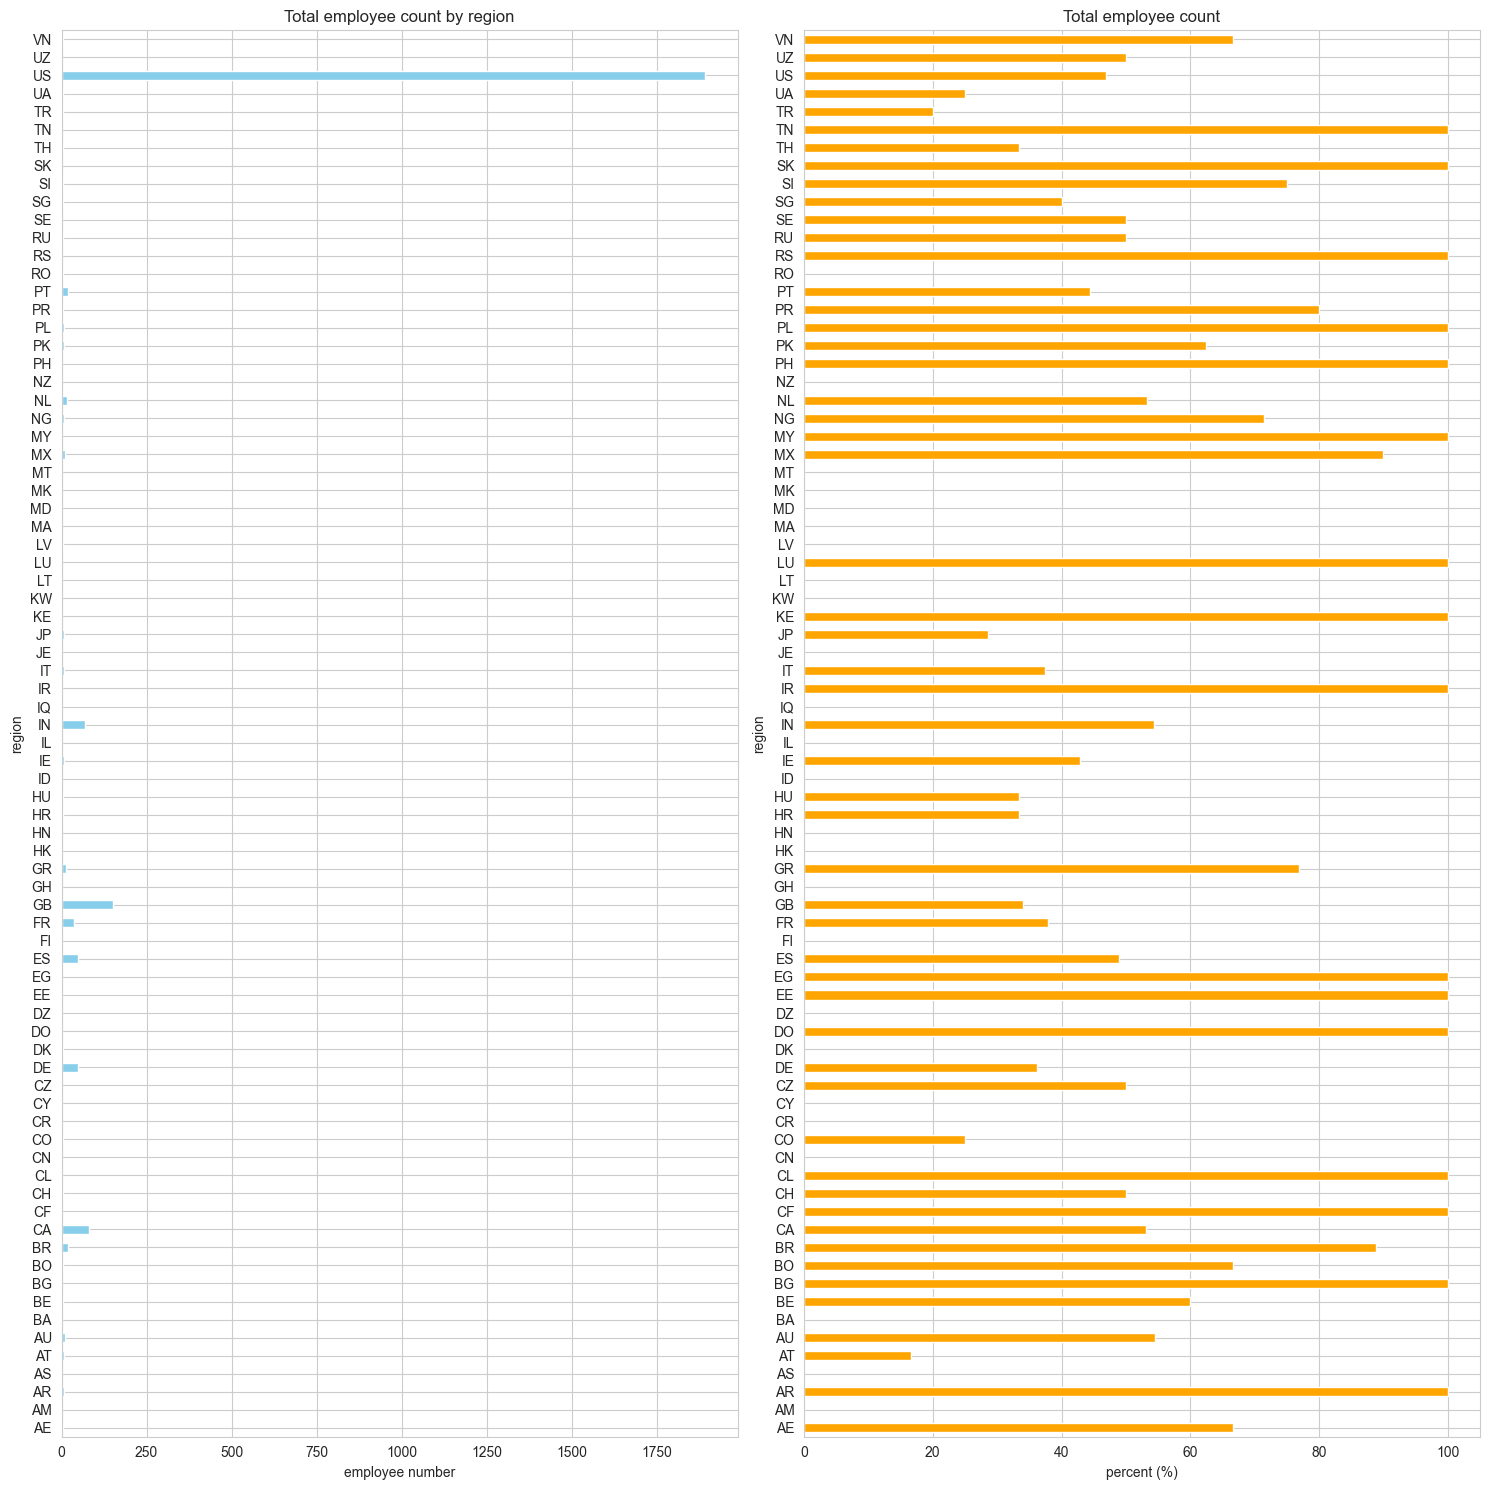

In [165]:
# Подсчет работников по регионам
region_counts = df['employee_residence'].value_counts()
remote_counts = df[df['remote_ratio'] == 100]['employee_residence'].value_counts()

# Объединение результатов
summary = pd.DataFrame({
    'total_count': region_counts,
    'remote_count': remote_counts
}).fillna(0)

# Рассчет процента удаленных работников
summary['remote_percentage'] = (summary['remote_count'] / summary['total_count']) * 100

# Визуализация на горизонтальных столбчатых диаграммах
fig, ax = plt.subplots(1, 2, figsize=(15, 15))

# Первое значение: общее количество работников по регионам
summary['total_count'].plot(kind='barh', ax=ax[0], color='skyblue')
ax[0].set_title('Total employee count by region')
ax[0].set_xlabel('employee number')
ax[0].set_ylabel('region')

# Второе значение: процент удаленных работников по регионам
summary['remote_percentage'].plot(kind='barh', ax=ax[1], color='orange')
ax[1].set_title('Total employee count')
ax[1].set_xlabel('percent (%)')
ax[1].set_ylabel('region')

# Показать диаграммы
plt.tight_layout()
plt.show()

Большинство работников Data Science - работники из США. ПРи этом, почти половина из них работает удаленно.В целом, в большинстве стран преобладает удаленная работа.